In [1]:
import numpy as np
import matplotlib.pyplot as plt

Решаем это:
$$\begin{align}
   \frac{\partial^2 u}{\partial t^2} &=
   c^2 \frac{\partial^2 u}{\partial x^2},
   \quad x \in (0, l), \quad t \in (0, T], \\ 
   u(x,0) &= I(x), \quad x \in [0, l],\\ 
   \frac{\partial u(x,0)}{\partial t} &= 0, \quad x \in [0, l],\\ 
   u(0,t) &= 0, \quad t \in (0, T],\\ 
   u(l,t) &= 0, \quad t \in (0, T].
\end{align}$$   

Число Куранта: $\gamma = c\frac{\tau}{h}$.

Использовать будем явный метод

In [80]:
def solution(I, V, c, l, tau, gamma, T, user_action=None):
    """I, V - н.у
    с - тот самый коэффициент в волновом уравнении
    гаммма - число Куранта
    тау - шаг сетки времени"""
    ims = []
    K = int(round(T/tau))
    t = np.linspace(0, K*tau, K+1)
    dx = tau*c/float(gamma)
    N = int(round(l/dx))
    x = np.linspace(0, l, N+1)       
    C2 = gamma**2                   

    if V is None or V == 0:
        V = lambda x: 0
    y   = np.zeros(N+1)   # слой n+1
    y_1 = np.zeros(N+1)   # слой n
    y_2 = np.zeros(N+1)   # слой n-1

    # Начальное условие
    for i in range(0,N+1):
        y_1[i] = I(x[i])
    # Нужно для графика
    if user_action is not None:
        user_action(y_1, x, t, 0, ims)

    # Первый временной шаг
    n = 0
    for i in range(1, N):
        y[i] = y_1[i] + tau*V(x[i]) + 0.5*C2*(y_1[i-1] - 2*y_1[i] + y_1[i+1])
    y[0] = 0
    y[N] = 0

    if user_action is not None:
        user_action(y, x, t, 1, ims)

    y_2[:] = y_1;  y_1[:] = y

    for n in range(1, K):
        for i in range(1, N):
            y[i] = - y_2[i] + 2*y_1[i] + C2*(y_1[i-1] - 2*y_1[i] + y_1[i+1])

        y[0] = 0
        y[N] = 0 # граничные условия
        if user_action is not None:
            if user_action(y, x, t, n+1, ims):
                break

        y_2[:] = y_1
        y_1[:] = y


    return y, x, t, ims


Пусть н.у будет такое:
$$\begin{equation}
   I(x) = \begin{cases}
   a x/x_0, & x < x_0, \\ 
   a(l - x)/(l - x_0), & x \geq x_0.
   \end{cases}
\end{equation}$$
(будто оттянули струну)

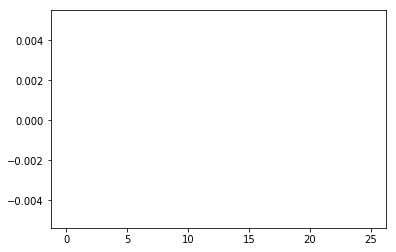

In [81]:
import matplotlib.animation as animation
fig = plt.figure()
def plot_it(u, x, t, n, ims):
    im, = plt.plot(u, animated=True, label = 't=%f' % t[n])
    ims.append([im])
    
gamma = 0.5
l = 0.75
x0 = 0.8*l
a = 0.005
freq = 440
wavelength = 2*l
c = freq*wavelength
omega = 2*np.pi*freq
num_periods = 1
T = 2*np.pi/omega*num_periods
tau = l/50./c

def I(x):
    return a*x/x0 if x < x0 else a/(l-x0)*(l-x)
user_action = plot_it
u, x, t, ims = solution(I, 0, c, l, tau, gamma, T, user_action)
anim = animation.ArtistAnimation(fig, ims, interval=50, blit=True, repeat_delay=1000)


In [82]:
from IPython.display import HTML
HTML(anim.to_html5_video())